# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Import dataset from Heroku

In [2]:
from getpass import getpass
password = getpass('Enter database password')

connection = psycopg2.connect(user="azcaqpdjrciaow",
                                  password=password,
                                  host="ec2-34-226-18-183.compute-1.amazonaws.com",
                                  port="5432",
                                  database="d7m85rf8c5rhv5")
cursor = connection.cursor()
postgreSQL_select_Query = "select * from player_market_values where season = 2018 or season = 2017"

cursor.execute(postgreSQL_select_Query)
print("Loading data from Heroku")

data = cursor.fetchall()
df = pd.DataFrame(data, columns=['player_id', 'player_name', 'age', 'club_id', \
                                                    'team_from', 'league_from', 'team_to', 'country_of_birth', \
                                                    'country_of_citizenship', 'player_position', 'games', 'goals', \
                                                    'assists', 'hours_played', 'yellow_cards', 'red_cards', 'transfer_fee', \
                                                    'market_value', 'club_market_value', 'season'])
Football_df = df.drop(columns=['player_id', 'player_name', 'club_id', 'team_from', 'league_from', 'team_to', 'country_of_birth', 'country_of_citizenship', 'season'])
Football_df

Enter database password········
Loading data from Heroku


,age,player_position,games,goals,assists,hours_played,yellow_cards,red_cards,transfer_fee,market_value,club_market_value
0,25,Attack,27,25,16,40.4500,8,0,222000000,100000000,891180000
1,33,Attack,43,28,10,60.7667,4,1,117000000,100000000,816530000
2,25,Midfield,42,21,15,49.8833,1,0,125000000,90000000,604800000
3,22,Midfield,43,3,6,43.5333,5,0,70000000,65000000,671310000
4,25,Goalkeeper,51,0,0,76.5000,1,0,62500000,60000000,779850000
...,...,...,...,...,...,...,...,...,...,...,...
344,20,Midfield,1,0,0,0.1500,0,0,10000000,800000,301820000
345,20,Midfield,1,0,0,1.5000,0,0,5000000,800000,373820000
346,19,Attack,1,0,0,0.2500,0,0,5000000,800000,9050000
347,22,Defender,22,0,1,29.7333,3,0,5000000,600000,98420000


# Encoding categorical variables
#### hours_played converted to float and round to 2 decimals
#### player_position to dummie variables (Using Label Encoder)

In [3]:
Football_df["hours_played"] = round(pd.to_numeric(Football_df.hours_played, downcast="float"),2)
Football_df["hours_played"] = Football_df.hours_played.apply(lambda x: round(x, 2))
Football_cat= Football_df.dtypes[Football_df.dtypes == "object"].index.tolist()
Football_cat

['player_position']

In [4]:
Football_df = Football_df[Football_df.player_position != '0'] 
Football_df.player_position.value_counts() # Position 0 deleted

Attack        124
Midfield      106
Defender      101
Goalkeeper     17
Name: player_position, dtype: int64

In [5]:
# Create a Label Encoder instance
le = preprocessing.LabelEncoder()

# Fit and transform the LabelEncoder using the unique position value
encode_df = pd.DataFrame(le.fit_transform(Football_df["player_position"]))

# Check for position labels
encode_pos = le.transform(Football_df.player_position.unique())
for i in range(len(encode_pos)):
    print(f'Player position: {le.classes_[i]}, Encode position: {encode_pos[i]}')

Player position: Attack, Encode position: 0
Player position: Defender, Encode position: 3
Player position: Goalkeeper, Encode position: 2
Player position: Midfield, Encode position: 1


In [6]:
# Replace original player position with encoded labels
Football_df['player_position'] = encode_df[0].values
# Reescale market_value, club_market_value and transfer fee
Football_df.club_market_value = Football_df["club_market_value"] / 1000000
Football_df.transfer_fee = Football_df["transfer_fee"] / 1000000
Football_df.market_value = Football_df["market_value"] / 1000000
Football_df

C:\Users\18176\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\18176\anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,player_position,games,goals,assists,hours_played,yellow_cards,red_cards,transfer_fee,market_value,club_market_value
0,25,0,27,25,16,40.45,8,0,222.0,100.0,891.18
1,33,0,43,28,10,60.77,4,1,117.0,100.0,816.53
2,25,3,42,21,15,49.88,1,0,125.0,90.0,604.80
3,22,3,43,3,6,43.53,5,0,70.0,65.0,671.31
4,25,2,51,0,0,76.50,1,0,62.5,60.0,779.85
...,...,...,...,...,...,...,...,...,...,...,...
344,20,3,1,0,0,0.15,0,0,10.0,0.8,301.82
345,20,3,1,0,0,1.50,0,0,5.0,0.8,373.82
346,19,0,1,0,0,0.25,0,0,5.0,0.8,9.05
347,22,1,22,0,1,29.73,3,0,5.0,0.6,98.42


# Distribution of age for each Players

C:\Users\18176\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


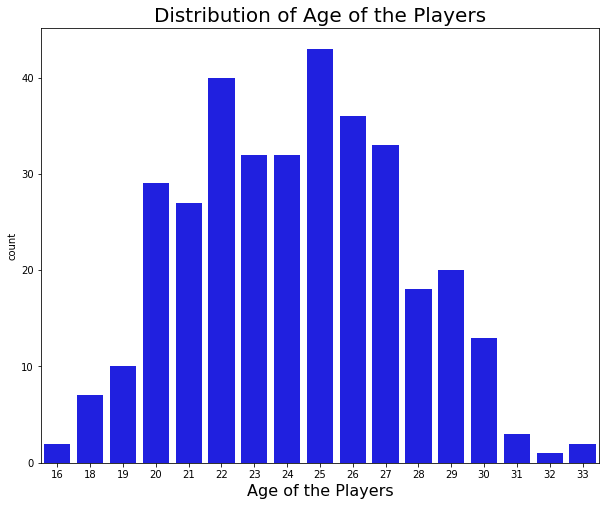

In [8]:
x = Football_df['age']
plt.figure(figsize=(10,8))
ax = sns.countplot(x,color='blue')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()


# Distribution of Age By Market Value and Transfer Fee

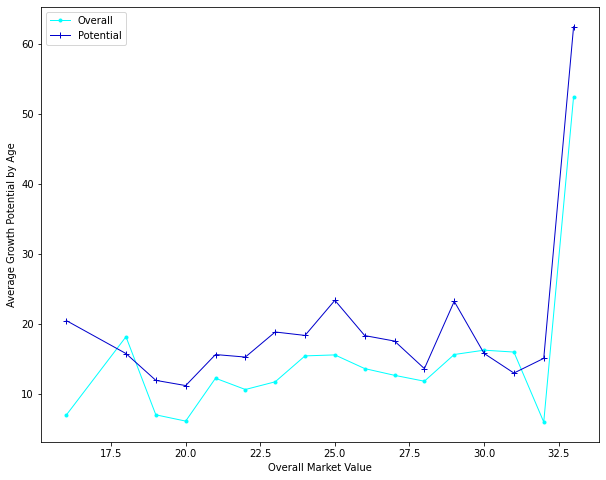

In [10]:
overall = pd.DataFrame(Football_df.groupby(["age"])['market_value'].mean())
Maket_value = pd.DataFrame(Football_df.groupby(["age"])['transfer_fee'].mean())

merged = pd.merge(overall, Maket_value, on='age', how='inner')
merged['age']= merged.index

fig, ax = plt.subplots(figsize=(10,8))

merged.reset_index(drop = True, inplace = True)

plt.plot('age', 'market_value', data=merged, marker='.', color='#00ffff', lw=1, label ="Overall" )
plt.plot('age', 'transfer_fee', data=merged, marker='+', color='#0000cc', lw=1, label = "Potential")
plt.xlabel('Overall Market Value')
plt.ylabel('Average Growth Potential by Age')
plt.legend();
fig.savefig("Distribution of Age By Market Value and Transfer Fee") 

# Correlation plot
Variables related to market value: transfer_fee, club_market_value, assists, goals, games, hours_played

C:\Users\18176\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


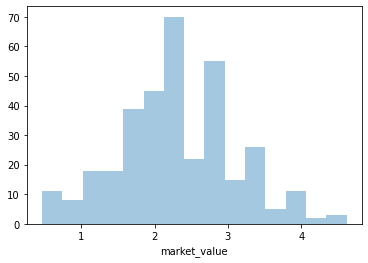

In [11]:
X = Football_df[['age','games', 'goals','assists','hours_played', 'yellow_cards', 
          'red_cards', 'transfer_fee', 'club_market_value','player_position']]
y = np.log1p(Football_df['market_value'])
sns.distplot(y,kde=False)
fig.savefig("Correlation plot") 

# Correlation plot
#### Variables related to market value: transfer_fee, club_market_value, assists, goals, games, hours_played

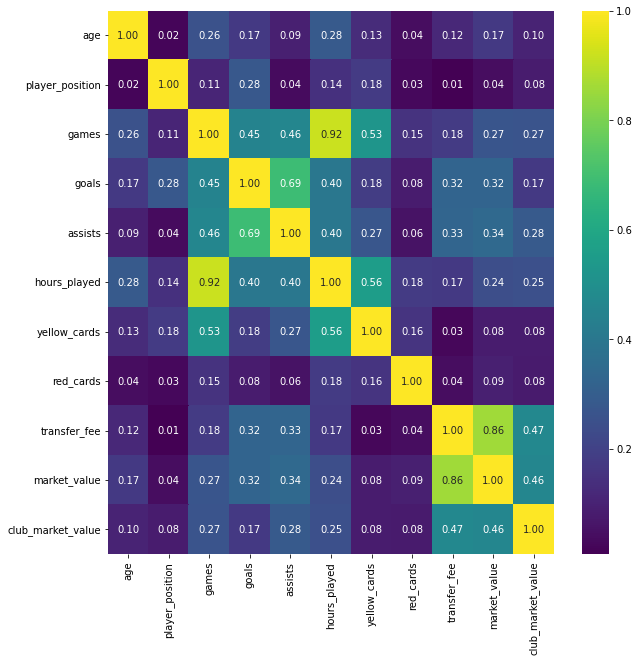

In [10]:
Football_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(Football_df.corr()), annot=True, cmap="viridis", fmt="0.2f")

# Multiple Regression Model

In [12]:
Football_df

,age,player_position,games,goals,assists,hours_played,yellow_cards,red_cards,transfer_fee,market_value,club_market_value
0,25,0,27,25,16,40.45,8,0,222.0,100.0,891.18
1,33,0,43,28,10,60.77,4,1,117.0,100.0,816.53
2,25,3,42,21,15,49.88,1,0,125.0,90.0,604.80
3,22,3,43,3,6,43.53,5,0,70.0,65.0,671.31
4,25,2,51,0,0,76.50,1,0,62.5,60.0,779.85
...,...,...,...,...,...,...,...,...,...,...,...
344,20,3,1,0,0,0.15,0,0,10.0,0.8,301.82
345,20,3,1,0,0,1.50,0,0,5.0,0.8,373.82
346,19,0,1,0,0,0.25,0,0,5.0,0.8,9.05
347,22,1,22,0,1,29.73,3,0,5.0,0.6,98.42


# Define x and y

In [13]:
x=Football_df.drop(['market_value'],axis=1).values
y=Football_df['market_value'].values

In [14]:
print(x)

[[ 25.     0.    27.   ...   0.   222.   891.18]
 [ 33.     0.    43.   ...   1.   117.   816.53]
 [ 25.     3.    42.   ...   0.   125.   604.8 ]
 ...
 [ 19.     0.     1.   ...   0.     5.     9.05]
 [ 22.     1.    22.   ...   0.     5.    98.42]
 [ 22.     1.    22.   ...   0.     5.    98.42]]


In [15]:
print(y)

[100.   100.    90.    65.    60.    55.    50.    50.    50.    50.
  50.    45.    45.    45.    45.    45.    40.    40.    40.    35.
  35.    32.    30.    30.    30.    30.    30.    30.    30.    28.
  25.    25.    25.    25.    25.    25.    25.    25.    25.    25.
  25.    25.    25.    25.    25.    25.    25.    23.    22.    22.
  22.    22.    20.    20.    20.    20.    20.    20.    20.    20.
  20.    20.    18.    18.    18.    18.    18.    18.    18.    18.
  18.    18.    18.    18.    18.    18.    17.    17.    17.    16.
  16.    16.    16.    16.    15.    15.    15.    15.    15.    15.
  15.    15.    15.    15.    15.    15.    15.    15.    15.    15.
  15.    15.    15.    15.    15.    15.    15.    15.    15.    15.
  15.    14.    14.    14.    14.    14.    14.    13.    13.    13.
  12.    12.    12.    12.    12.    12.    12.    12.    12.    12.
  12.    12.    12.    12.    11.    11.    11.    11.    10.5   10.
  10.    10.    10.    10.    10. 

# Split the dataset in training set and test set

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Train the model on the training set

In [17]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

# Predict the test set results

In [18]:
y_pred=ml.predict(x_test)
print(y_pred)

[54.34653021 15.11064572  9.47183871 41.99023057 10.54210222  8.40610189
  7.87425955 14.9688449   9.43484223  7.61996871  2.75845432 11.68962367
  6.60128221 10.84108415 16.78382752 10.69977009 17.17325243  2.30165413
  5.90692226 10.86780663  6.4617164  10.1880552  12.09328149 11.481013
 10.18760407 27.49503108 25.20363869 34.02762355 18.75277814  3.75152713
 17.19520381 15.41252655 16.31627171  8.7141147  14.32039222  7.01096592
  0.75960493 11.4942903  10.54943468 33.58670444  6.33471594 19.20429134
 13.02933306  9.44274658  9.50398584 10.13377629 24.82749539  7.97657521
 25.99966141 11.55614599  5.01357871  2.73633683  5.13752525 41.61361224
 11.86735781  8.00508682 10.53060912 11.59728861 15.32030725 17.34750859
  6.08215533  8.50178501 18.75944862  4.3265743   8.55580521 22.31625199
 15.32619676  7.84745359  5.86961198 15.37302208  6.45489951 11.00285501
 11.39869273 40.33938004  8.59506573  9.40380473 31.04127625  5.67695807
 12.99266221  7.75665893  6.16257315  3.72549697  5.9

# Evaluate the model

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6478578003008177

# Plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

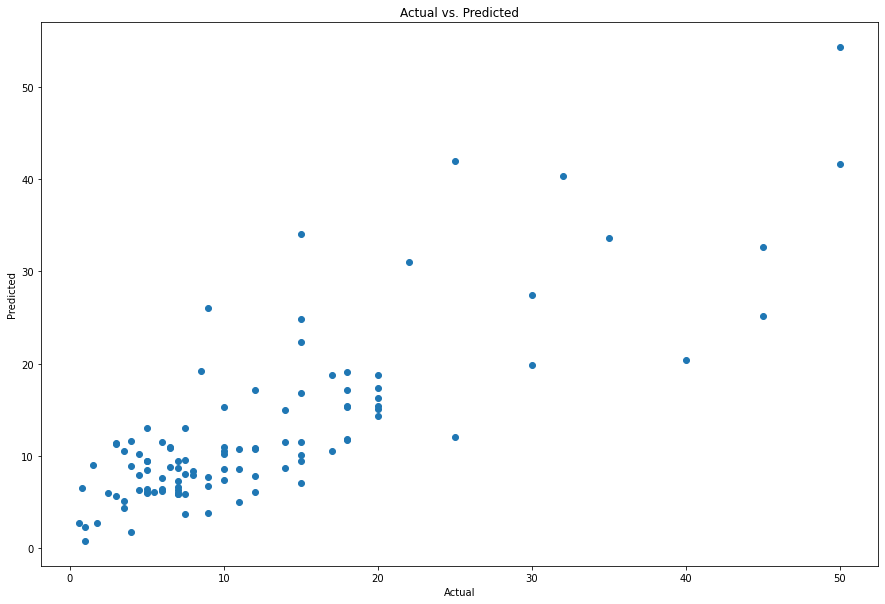

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Predicted Values

In [23]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,50.00,54.346530,-4.346530
1,20.00,15.110646,4.889354
2,5.00,9.471839,-4.471839
3,25.00,41.990231,-16.990231
4,3.50,10.542102,-7.042102
5,8.00,8.406102,-0.406102
6,8.00,7.874260,0.125740
7,14.00,14.968845,-0.968845
8,15.00,9.434842,5.565158
9,6.00,7.619969,-1.619969


# Use pycaret to load the dessign matrix and test it with multiple classifiers
### fold_shuffle=True
### normalize=True
### train_size=0.8

In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 4.3 MB/s 
     |████████████████████████████████| 113 kB 47.5 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 1.7 MB 47.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 6.8 MB 49.2 MB/s 
     |████████████████████████████████| 1.3 MB 39.6 MB/s 
     |████████████████████████████████| 167 kB 61.1 MB/s 
     |████████████████████████████████| 261 kB 57.3 MB/s 
     |████████████████████████████████| 2.0 MB 46.4 MB/s 
     |████████████████████████████████| 10.1 MB 34.3 MB/s 
     |████████████████████████████████| 675 kB 37.9 MB/s 
     |████████████████████████████████| 3.1 MB 39.9 MB/s 
     |██████████████████

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [11]:
from pycaret.regression import *

In [12]:
exp_reg101 = setup(data = Football_df, target = 'market_value', session_id=123, normalize=True, fold_shuffle=True, train_size=0.8, \
                   numeric_features= ['age', 'games', 'goals', 'assists', 'hours_played', 'transfer_fee', 'club_market_value']) 

,Description,Value
0,session_id,123
1,Target,market_value
2,Original Data,"(348, 11)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(278, 30)"


In [13]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.9741,5.457420e+01,7.0480,6.407000e-01,0.5217,0.7191,0.014
lasso,Lasso Regression,5.0041,5.432870e+01,7.0968,6.402000e-01,0.5393,0.8086,0.016
et,Extra Trees Regressor,5.0099,4.950550e+01,6.8947,6.285000e-01,0.5243,0.6761,0.445
huber,Huber Regressor,5.0407,5.558050e+01,7.1345,6.145000e-01,0.5226,0.6682,0.035
br,Bayesian Ridge,5.1641,5.750650e+01,7.2704,6.119000e-01,0.5374,0.7442,0.014
ridge,Ridge Regression,5.2583,5.943020e+01,7.3922,5.959000e-01,0.5474,0.7505,0.014
lr,Linear Regression,5.3181,6.058340e+01,7.4747,5.864000e-01,0.5587,0.7594,0.297
en,Elastic Net,5.4366,6.632840e+01,7.7558,5.847000e-01,0.5911,0.9417,0.016
gbr,Gradient Boosting Regressor,5.1401,5.489710e+01,7.3027,5.630000e-01,0.5380,0.7221,0.069
rf,Random Forest Regressor,5.2631,6.081110e+01,7.6049,5.564000e-01,0.5274,0.6985,0.492


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

# Testing with the highest performance model (Orthogonal Matching Pursuit)

In [14]:
omp=create_model('omp',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.1974,83.6796,9.1477,0.7830,0.5241,0.6013
1,6.2586,135.8797,11.6567,0.6180,0.4313,0.4632
2,3.5146,18.2790,4.2754,0.7663,0.5164,0.7510
3,5.4926,66.2061,8.1367,0.6184,0.5443,0.7645
4,3.1656,14.4781,3.8050,0.8815,0.3649,0.4577
5,5.0189,44.5974,6.6781,0.3937,0.6079,0.8641
6,4.4079,34.2490,5.8523,0.6041,0.5116,0.7584
7,5.5537,50.3266,7.0941,0.1439,0.5340,0.6737
8,4.4081,34.0008,5.8310,0.7667,0.5976,0.9942
9,5.7234,64.0458,8.0029,0.8309,0.5850,0.8625


In [15]:
# Tunning the model for better performance
tuned_omp=tune_model(omp, fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.8846,76.6968,8.7577,0.8011,0.4944,0.5614
1,6.1558,130.5461,11.4257,0.6330,0.4423,0.5293
2,3.5358,18.5751,4.3099,0.7625,0.5050,0.7324
3,6.1392,79.8776,8.9374,0.5396,0.5847,0.8185
4,3.7932,20.4221,4.5191,0.8328,0.3780,0.5189
5,4.9822,42.4915,6.5185,0.4223,0.5848,0.8784
6,4.5467,36.5304,6.0440,0.5777,0.5138,0.7571
7,5.6209,51.9635,7.2086,0.1161,0.5244,0.6715
8,4.2691,34.8027,5.8994,0.7612,0.5692,0.8984
9,5.9234,68.5268,8.2781,0.8191,0.5894,0.9167


In [17]:
# Creating another models for comparison
lasso = create_model('lasso', fold=10)
lr = create_model('lr', fold=10)
et = create_model('et', fold=10)
ridge = create_model('ridge', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.9883,83.6619,9.1467,0.7831,0.5388,0.6028
1,6.2731,133.8597,11.5698,0.6237,0.4202,0.4379
2,3.6979,20.2796,4.5033,0.7408,0.5516,0.8319
3,6.0764,73.7756,8.5893,0.5748,0.6382,0.9636
4,3.2911,16.3025,4.0376,0.8665,0.3940,0.4895
5,4.8984,45.2209,6.7246,0.3852,0.5892,0.8251
6,4.9072,41.9813,6.4793,0.5147,0.5353,0.7658
7,6.2676,63.1742,7.9482,-0.0746,0.5662,0.7477
8,4.6506,35.1469,5.9285,0.7588,0.6026,1.0020
9,6.5322,80.8991,8.9944,0.7865,0.6384,0.8382


In [21]:
predict_model(omp)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,4.4797,36.0779,6.0065,0.726,0.5713,0.8568


,age,games,goals,assists,hours_played,transfer_fee,club_market_value,player_position_0,player_position_1,player_position_2,player_position_3,yellow_cards_0,yellow_cards_1,yellow_cards_10,yellow_cards_11,yellow_cards_12,yellow_cards_13,yellow_cards_15,yellow_cards_16,yellow_cards_2,yellow_cards_3,yellow_cards_4,yellow_cards_5,yellow_cards_6,yellow_cards_7,yellow_cards_8,yellow_cards_9,red_cards_0,red_cards_1,red_cards_2,market_value,Label
0,-1.312891,0.346611,0.521312,0.695729,0.387639,-0.341175,-0.711708,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,10.322872
1,1.163673,2.349063,0.691812,0.400893,2.748101,-0.103114,0.102644,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0,14.538590
2,-1.312891,0.266513,-0.501686,-0.483617,-0.056836,0.352748,0.885975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22.0,18.116667
3,1.473244,0.106317,0.180313,1.580239,-0.021774,0.099492,1.090778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0,13.062950
4,-1.003320,0.586906,-0.331186,-0.188780,0.431331,-0.356371,-0.706475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7.5,10.555390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-0.074609,-0.934958,-0.672186,-0.188780,-0.679856,-0.660279,-0.618650,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,2.621388
66,-0.074609,-0.614565,-0.501686,-0.778453,-0.410150,-0.305719,1.090778,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.5,7.214325
67,0.234962,1.227690,2.396808,0.990566,0.730704,-0.001811,0.090892,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0,15.689860
68,1.782814,1.868474,-0.331186,-0.483617,2.302547,1.213821,1.090778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,28.774366


In [18]:
# Make predictions on the validation set
print(predict_model(omp))
print(predict_model(tuned_omp))
print(predict_model(lasso))
print(predict_model(lr))
print(predict_model(et))
print(predict_model(ridge))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,4.4797,36.0779,6.0065,0.726,0.5713,0.8568


         age     games     goals  ...  red_cards_2  market_value      Label
0  -1.312891  0.346611  0.521312  ...          0.0           5.0  10.322872
1   1.163673  2.349063  0.691812  ...          0.0          18.0  14.538590
2  -1.312891  0.266513 -0.501686  ...          0.0          22.0  18.116667
3   1.473244  0.106317  0.180313  ...          0.0          25.0  13.062950
4  -1.003320  0.586906 -0.331186  ...          0.0           7.5  10.555390
..       ...       ...       ...  ...          ...           ...        ...
65 -0.074609 -0.934958 -0.672186  ...          0.0           7.0   2.621388
66 -0.074609 -0.614565 -0.501686  ...          0.0           8.5   7.214325
67  0.234962  1.227690  2.396808  ...          0.0          18.0  15.689860
68  1.782814  1.868474 -0.331186  ...          0.0          45.0  28.774366
69  0.544532  0.186415 -0.160687  ...          0.0           2.5  12.945966

[70 rows x 32 columns]


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,4.3467,35.5604,5.9633,0.7299,0.5581,0.7934


         age     games     goals  ...  red_cards_2  market_value      Label
0  -1.312891  0.346611  0.521312  ...          0.0           5.0   9.627968
1   1.163673  2.349063  0.691812  ...          0.0          18.0  15.941558
2  -1.312891  0.266513 -0.501686  ...          0.0          22.0  17.402873
3   1.473244  0.106317  0.180313  ...          0.0          25.0  14.225053
4  -1.003320  0.586906 -0.331186  ...          0.0           7.5  12.072039
..       ...       ...       ...  ...          ...           ...        ...
65 -0.074609 -0.934958 -0.672186  ...          0.0           7.0   3.684451
66 -0.074609 -0.614565 -0.501686  ...          0.0           8.5   8.306053
67  0.234962  1.227690  2.396808  ...          0.0          18.0  15.083305
68  1.782814  1.868474 -0.331186  ...          0.0          45.0  32.292485
69  0.544532  0.186415 -0.160687  ...          0.0           2.5  12.230280

[70 rows x 32 columns]


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,4.5593,37.065399,6.0881,0.7185,0.5637,0.8719


         age     games     goals  ...  red_cards_2  market_value      Label
0  -1.312891  0.346611  0.521312  ...          0.0           5.0   9.791557
1   1.163673  2.349063  0.691812  ...          0.0          18.0  14.250206
2  -1.312891  0.266513 -0.501686  ...          0.0          22.0  17.091867
3   1.473244  0.106317  0.180313  ...          0.0          25.0  14.245163
4  -1.003320  0.586906 -0.331186  ...          0.0           7.5   9.861333
..       ...       ...       ...  ...          ...           ...        ...
65 -0.074609 -0.934958 -0.672186  ...          0.0           7.0   5.165288
66 -0.074609 -0.614565 -0.501686  ...          0.0           8.5   9.243205
67  0.234962  1.227690  2.396808  ...          0.0          18.0  14.247684
68  1.782814  1.868474 -0.331186  ...          0.0          45.0  27.788498
69  0.544532  0.186415 -0.160687  ...          0.0           2.5  12.329829

[70 rows x 32 columns]


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,4.7097,36.531898,6.0442,0.7226,0.6049,0.8185


         age     games     goals  ...  red_cards_2  market_value      Label
0  -1.312891  0.346611  0.521312  ...          0.0           5.0   8.280003
1   1.163673  2.349063  0.691812  ...          0.0          18.0  14.876871
2  -1.312891  0.266513 -0.501686  ...          0.0          22.0  19.200516
3   1.473244  0.106317  0.180313  ...          0.0          25.0  15.453853
4  -1.003320  0.586906 -0.331186  ...          0.0           7.5  13.646074
..       ...       ...       ...  ...          ...           ...        ...
65 -0.074609 -0.934958 -0.672186  ...          0.0           7.0   0.444690
66 -0.074609 -0.614565 -0.501686  ...          0.0           8.5   9.018784
67  0.234962  1.227690  2.396808  ...          0.0          18.0  13.476581
68  1.782814  1.868474 -0.331186  ...          0.0          45.0  32.327118
69  0.544532  0.186415 -0.160687  ...          0.0           2.5  12.382663

[70 rows x 32 columns]


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,4.2357,35.2508,5.9372,0.7323,0.5283,0.7532


         age     games     goals  ...  red_cards_2  market_value    Label
0  -1.312891  0.346611  0.521312  ...          0.0           5.0   9.5700
1   1.163673  2.349063  0.691812  ...          0.0          18.0  17.1500
2  -1.312891  0.266513 -0.501686  ...          0.0          22.0  17.5700
3   1.473244  0.106317  0.180313  ...          0.0          25.0  18.4300
4  -1.003320  0.586906 -0.331186  ...          0.0           7.5   8.0450
..       ...       ...       ...  ...          ...           ...      ...
65 -0.074609 -0.934958 -0.672186  ...          0.0           7.0   3.7015
66 -0.074609 -0.614565 -0.501686  ...          0.0           8.5   8.5170
67  0.234962  1.227690  2.396808  ...          0.0          18.0  15.4150
68  1.782814  1.868474 -0.331186  ...          0.0          45.0  26.8000
69  0.544532  0.186415 -0.160687  ...          0.0           2.5  10.6700

[70 rows x 32 columns]


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,4.6424,35.6647,5.972,0.7291,0.5937,0.8125


         age     games     goals  ...  red_cards_2  market_value      Label
0  -1.312891  0.346611  0.521312  ...          0.0           5.0   8.303362
1   1.163673  2.349063  0.691812  ...          0.0          18.0  14.728861
2  -1.312891  0.266513 -0.501686  ...          0.0          22.0  18.996910
3   1.473244  0.106317  0.180313  ...          0.0          25.0  15.401581
4  -1.003320  0.586906 -0.331186  ...          0.0           7.5  13.371220
..       ...       ...       ...  ...          ...           ...        ...
65 -0.074609 -0.934958 -0.672186  ...          0.0           7.0   0.654133
66 -0.074609 -0.614565 -0.501686  ...          0.0           8.5   9.013286
67  0.234962  1.227690  2.396808  ...          0.0          18.0  13.614690
68  1.782814  1.868474 -0.331186  ...          0.0          45.0  32.078014
69  0.544532  0.186415 -0.160687  ...          0.0           2.5  12.325583

[70 rows x 32 columns]


In [22]:
y_test = Football_df.market_value
data_test = Football_df.drop('market_value', axis=1)
data_test.head()

,age,player_position,games,goals,assists,hours_played,yellow_cards,red_cards,transfer_fee,club_market_value
0,25,0,27,25,16,40.45,8,0,222.0,891.18
1,33,0,43,28,10,60.77,4,1,117.0,816.53
2,25,3,42,21,15,49.88,1,0,125.0,604.80
3,22,3,43,3,6,43.53,5,0,70.0,671.31
4,25,2,51,0,0,76.50,1,0,62.5,779.85


In [30]:
# Create the prediction vector for the models
omp_predictions = predict_model(omp, data_test)
tuned_omp_predictions = predict_model(tuned_omp, data_test)
lasso_predictions = predict_model(lasso, data_test)
lr_predictions = predict_model(lr, data_test)
et_predictions = predict_model(et, data_test)
ridge_predictions = predict_model(ridge, data_test)

# Perform test with all the data with every model


In [31]:
from sklearn.metrics import r2_score
print(f'The score of the OMP model is: {r2_score(y_test.values, omp_predictions.Label.values)}')
print(f'The score of the Tuned OMP model is: {r2_score(y_test.values, tuned_omp_predictions.Label.values)}')
print(f'The score of the Lasso model is: {r2_score(y_test.values, lasso_predictions.Label.values)}')
print(f'The score of the Linear Regression model is: {r2_score(y_test.values, lr_predictions.Label.values)}')
print(f'The score of the Extra Trees Regressor model is: {r2_score(y_test.values, et_predictions.Label.values)}')
print(f'The score of the Ridge Regression model is: {r2_score(y_test.values, ridge_predictions.Label.values)}')

The score of the OMP model is: 0.752602382442901
The score of the Tuned OMP model is: 0.7435596707456325
The score of the Lasso model is: 0.740544488116386
The score of the Linear Regression model is: 0.7625340021007935
The score of the Extra Trees Regressor model is: 0.9600399856754971
The score of the Ridge Regression model is: 0.7632239969809677


In [55]:
pred_results = pd.DataFrame({'y_test':y_test.values,
                             'y_pred_omp':omp_predictions.Label.values,
                             'y_pred_tuned_omp':tuned_omp_predictions.Label.values,
                             'y_pred_lasso':lasso_predictions.Label.values,
                             'y_pred_lr':lr_predictions.Label.values,
                             'y_pred_et':et_predictions.Label.values,
                             'y_pred_ridge':ridge_predictions.Label.values
})
pred_results.sample(10)

,y_test,y_pred_omp,y_pred_tuned_omp,y_pred_lasso,y_pred_lr,y_pred_et,y_pred_ridge
258,5.0,10.322872,9.627968,9.791557,8.280003,9.5700,8.303362
75,18.0,14.538590,15.941558,14.250206,14.876872,17.1500,14.728861
48,22.0,18.116667,17.402873,17.091867,19.200516,17.5700,18.996910
31,25.0,13.062950,14.225053,14.245163,15.453853,18.4300,15.401581
199,7.5,10.555390,12.072039,9.861333,13.646074,8.0450,13.371220
246,6.0,6.443081,5.701236,6.474870,8.081764,5.6600,7.941285
95,15.0,15.144512,16.251857,16.475000,15.605688,19.5100,15.573856
304,3.0,5.140825,4.201244,6.386875,5.412181,5.1750,5.577823
239,6.5,7.544766,6.853505,7.206769,5.727834,6.9225,5.829432
219,7.0,18.603570,19.853794,18.862839,17.287966,17.5650,17.253309


Text(0, 0.5, 'Predicted Values')

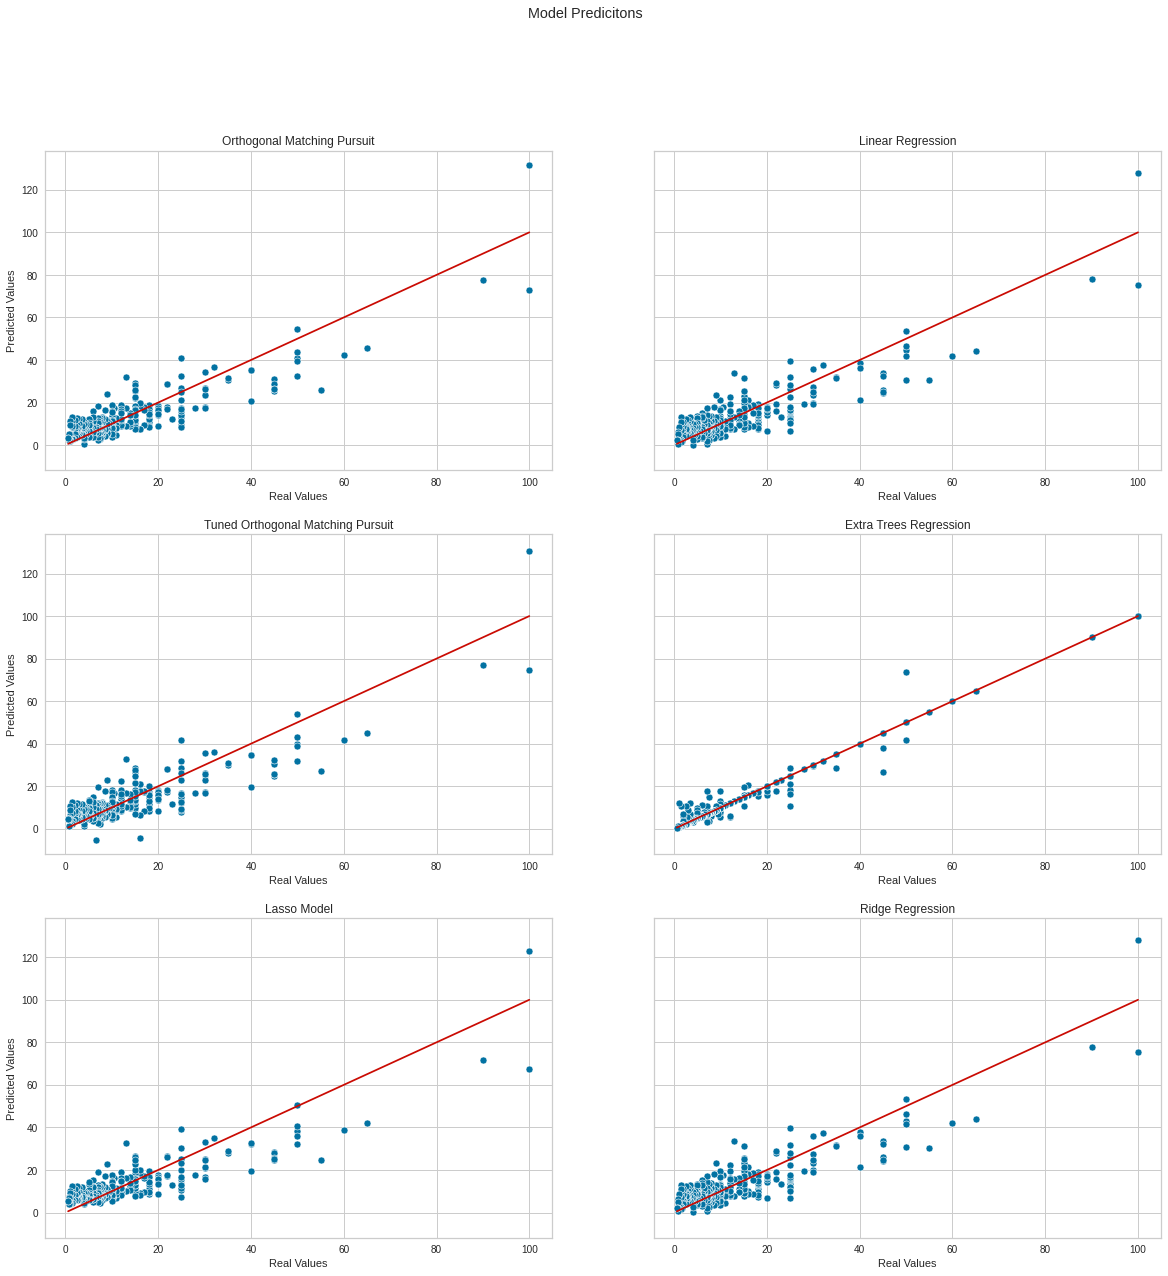

In [54]:
import seaborn as season
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharey=True)
fig.suptitle('Model Predicitons')

# Orthogonal Matching Pursuit	
sns.scatterplot(x='y_test', y='y_pred_omp', data=pred_results, ax=axes[0,0])
sns.lineplot(x='y_test', y='y_test', data=pred_results, ax=axes[0,0],  color='r')
axes[0,0].set_title('Orthogonal Matching Pursuit')
axes[0,0].set_xlabel('Real Values')
axes[0,0].set_ylabel('Predicted Values')

# Tuned Orthogonal Matching Pursuit	
sns.scatterplot(x='y_test', y='y_pred_tuned_omp', data=pred_results, ax=axes[1,0])
sns.lineplot(x='y_test', y='y_test', data=pred_results, ax=axes[1,0],  color='r')
axes[1,0].set_title('Tuned Orthogonal Matching Pursuit')
axes[1,0].set_xlabel('Real Values')
axes[1,0].set_ylabel('Predicted Values')

# Lasso Model
sns.scatterplot(x='y_test', y='y_pred_lasso', data=pred_results, ax=axes[2,0])
sns.lineplot(x='y_test', y='y_test', data=pred_results, ax=axes[2,0],  color='r')
axes[2,0].set_title('Lasso Model')
axes[2,0].set_xlabel('Real Values')
axes[2,0].set_ylabel('Predicted Values')


# Linear Regression
sns.scatterplot(x='y_test', y='y_pred_lr', data=pred_results, ax=axes[0,1])
sns.lineplot(x='y_test', y='y_test', data=pred_results, ax=axes[0,1],  color='r')
axes[0,1].set_title('Linear Regression')
axes[0,1].set_xlabel('Real Values')
axes[0,1].set_ylabel('Predicted Values')

# Extra Trees Regression
sns.scatterplot(x='y_test', y='y_pred_et', data=pred_results, ax=axes[1,1])
sns.lineplot(x='y_test', y='y_test', data=pred_results, ax=axes[1,1],  color='r')
axes[1,1].set_title('Extra Trees Regression')
axes[1,1].set_xlabel('Real Values')
axes[1,1].set_ylabel('Predicted Values')

# Ridge Regression
sns.scatterplot(x='y_test', y='y_pred_ridge', data=pred_results, ax=axes[2,1])
sns.lineplot(x='y_test', y='y_test', data=pred_results, ax=axes[2,1],  color='r')
axes[2,1].set_title('Ridge Regression')
axes[2,1].set_xlabel('Real Values')
axes[2,1].set_ylabel('Predicted Values')

# Extra Plots

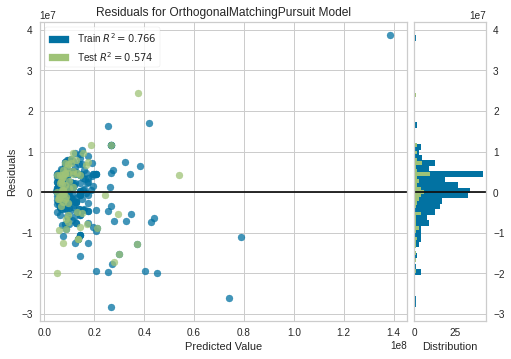

In [ ]:
plot_model(omp)

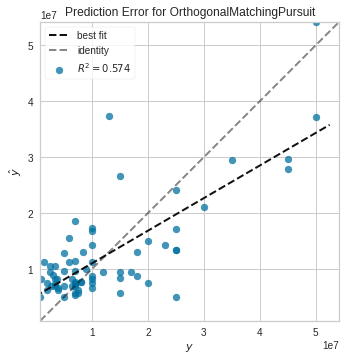

In [ ]:
plot_model(omp, 'error')

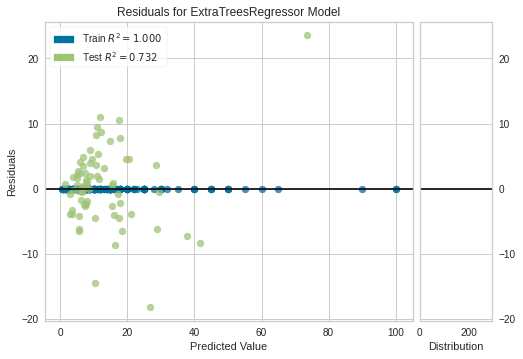

In [56]:
plot_model(et)

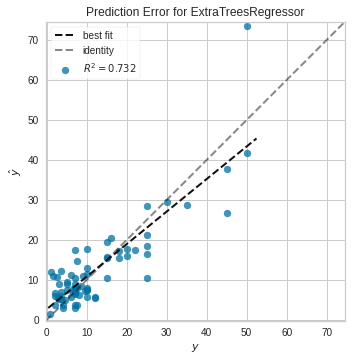

In [57]:
plot_model(et, 'error')

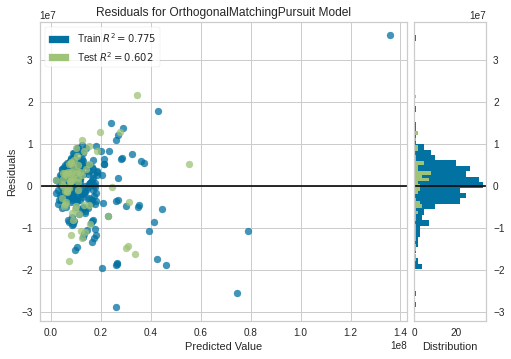

In [ ]:
plot_model(tuned_omp)

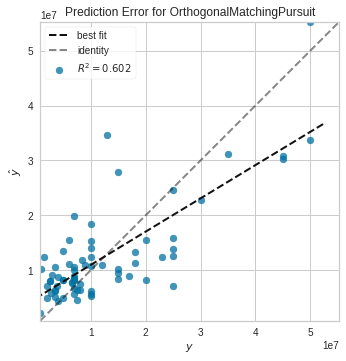

In [ ]:
plot_model(tuned_omp, 'error')

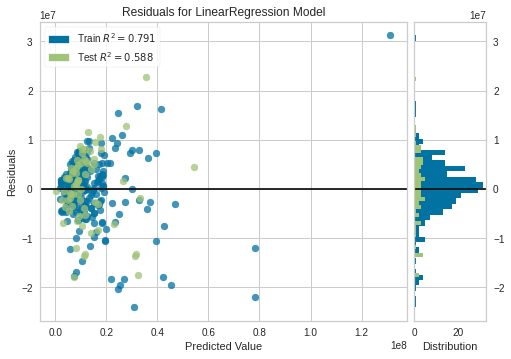

In [ ]:
plot_model(lr)

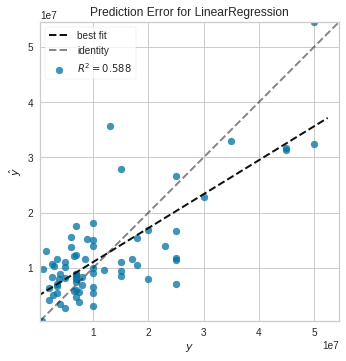

In [ ]:
plot_model(lr, 'error')

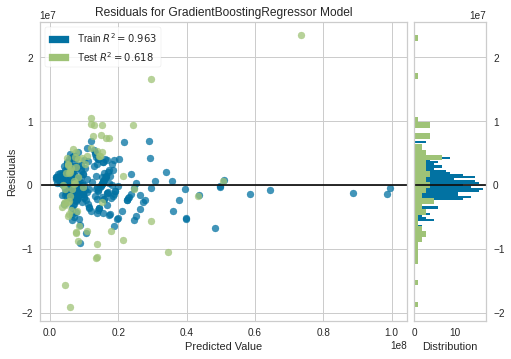

In [ ]:
plot_model(gbr)

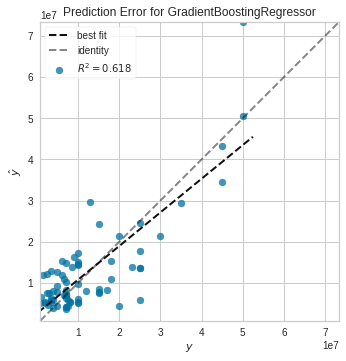

In [ ]:
plot_model(gbr, 'error')